### 1. 경사하강법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 머신러닝 -> 지도학습 -> 데이터와 답 입력 -> 학습 -> 식 찾기
---
- y= 4*X +6
1. 위식에 근사한 데이터 생성
2. 답 생성

경사하강 사용해서 위 식에있는 계수 도출

근사 처리위해 random 사용

### Numpy Random function 3가지
---
 1. np.random.randint() : 정수난수 생성 (균일분포를 따르는)
 2. np.random.rand : (0~1사이 균일분포 내에서)실수난수 생성 
                     return -> matrix array (행렬)                  
 3. np.random.randn() : 표준정규분포 내에서 난수 생성
 4. np.random.shuffle() : 

In [8]:
np.random.seed(0)

# 위 식을 근사한 데이터 생성 * 노이즈(random)
X = 2* np.random.rand(100,1)
X[:10]

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304]])

In [10]:
# y: 종속변수
# X: 변수 (100개)
y = 4*X +6 + np.random.randn(100,1) # 노이즈 추가

[]

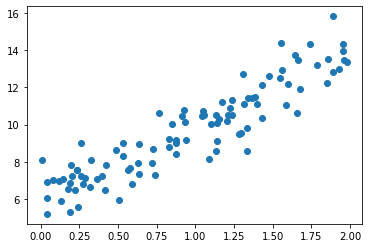

In [57]:
# 시각화
plt.scatter(X,y)


In [45]:
# 가중치(W1. W0)를 업데이트 할 w1_update, w2_update 반환
# 오차 : 원래값 - 예측값
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y) # 100
    # 먼저 반환할 값ㅂ을 저장할 배열 선언 (0으로 초기화)
    w1_update = np.zeros_like(w1) # w1 같은 크기의 배열 생성
    w0_update = np.zeros_like(w0)
    
    # 예측값을 (W0 + W1*X)구해야 한다.
    y_pred = w0 + np.dot(X, w1.T)
    
    # 오차값 
    diff = y - y_pred
    
    # w0 = 1
    w0_fact = np.ones((N,1)) # 100 배열 생성, 1로 초기화
    
    #
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_fact.T, diff))
    
    return w1_update, w0_update

In [46]:
# 경사 하강
# parameter : 데이터 ,원래답 ,반복횟수: 학습률 
def gradient_descent_steps(X, y, iters=10000):

    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for idx in range(iters):
        # 현재 가중치(w0,w1) - 수정된 가중치(get_weight_updates())
        w1_upd, w0_upd = \
        get_weight_updates(w1,w0,X,y, learning_rate=0.01)
        w1 = w1 - w1_upd
        w0 = w0 - w0_upd
    
    return w1, w0

In [47]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N # 평균제곱오차
    return cost

In [48]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)

In [49]:
# w0 : y절편 (원래값 : 6), w1 : 기울기 (원래값 : 4)

print('w1: {0:.3f}, w0: {1:.3f}'.format(w1[0,0],w0[0,0]))

w1: 3.944, w0: 5.893


In [50]:
# 원래값 - 예측값 실제 얼마나 오차가 있는지 확인
y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

Gradient Descent Total Cost:0.9596


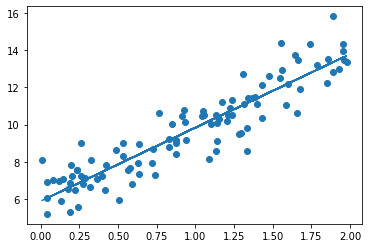

In [59]:
# 원래데이터 : 산점도 (데이터 분포) -> scatter
# 가중치를 적용한 직선 -> plot
plt.scatter(X, y)
plt.plot(X, y_pred)

### 다항회귀와 과대적합/과소적합 이해

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import PolynomialFeatures

C:\Users\TJ\anaconda3\envs\ml01-02\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# 다항회귀에 사용한 원데이터 생성 : 2*2
X = np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [4]:
# degree = 2 데이터 파생
# 객체만 생성
poly = PolynomialFeatures(degree=2)

# 데이터 파생할 식 구성(학습)
poly.fit(X)

# 데이터 파생(변환)
poly_ftr = poly.transform(X)

print('원래 데이터\n',X)
print('변환된 데이터\n', poly_ftr)

원래 데이터
 [[0 1]
 [2 3]]
변환된 데이터
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [8]:
# X : 행렬, arange() => ndarray = > 브로드캐스팅
def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y
X = np.arange(4).reshape(2,2)
print('일차 단항식 feature: \n', X)
y = polynomial_func(X)
print('일차 단항식 결정값(답): \n', y)

일차 단항식 feature: 
 [[0 1]
 [2 3]]
일차 단항식 결정값(답): 
 [[ 1  5]
 [17 43]]


In [9]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 feature: \n',poly_ftr)

3차 다항식 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [11]:
# 모델 : 선형 회귀
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X,y) -> 원 데이터 학습 (X)
# 파생 데이터로 학습
model.fit(poly_ftr,y)
print('3차 다항식 feature: \n',poly_ftr)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape :', model.coef_.shape)

3차 다항식 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 shape : (2, 10)


In [15]:
# Pipeline class : 처리 순서 지정 일괄처리
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y

model = Pipeline([    
      ('poly', PolynomialFeatures(degree=3)) # 처리 순서에 따른 일단위
    , ('linear', LinearRegression())
])

# 원래데이터 생성
X = np.arange(4).reshape(2,2)
# 원래 답 생성
y = polynomial_func(X)

model.fit(X,y)
# 계수 출력
print('계수 출력 \n', model.named_steps['linear'].coef_)

계수 출력 
 [[0.         0.02402402 0.02402402 0.04804805 0.07207207 0.0960961
  0.0960961  0.14414414 0.21621622 0.31231231]
 [0.         0.05705706 0.05705706 0.11411411 0.17117117 0.22822823
  0.22822823 0.34234234 0.51351351 0.74174174]]


### Polynomial Regression 
- Overfitting
- Underfitting

In [16]:
# PolynomialFeatures : 데이터 파생 확장, 성능 향상
# degree (차수) : 하이퍼 파라미터
# 곡선형 데이터 생성 -> cos 사용
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score # 교차 검증

In [40]:
# random 값으로 구성된 X값에 대해 Cosin 적용된 값 반환
def true_func(X):
    return np.cos(1.5 * np.pi * X) # 곡선

# random.rand() : X 데이터 => 30개 생성
np.random.seed(0) #: 랜덤값 고정
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y: 답, np.random.randn(n_samples) * 0.1 : 잡음(오차)
y = true_func(X) + np.random.randn(n_samples) * 0.1

### np.newaxis
---

In [30]:
# np.newaxis 예제
arr = np.arange(4) 
arr.shape

(4,)

In [32]:
# arr을 Row 2차원 변경
row_vec = arr[np.newaxis, :] # np.newaxis -> 새로운 축을 추가한다
row_vec.shape

(1, 4)

In [34]:
# arr을 Col 2차원 변경
col_vec = arr[:, np.newaxis] 
col_vec.shape

(4, 1)

In [35]:
# arr을 Col 2차원 변경
col_vec = arr[:, None] # np,newaxis == None 
col_vec.shape

(4, 1)

In [37]:
arr = np.arange(3*3).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [38]:
arr_3d = arr[np.newaxis, ..., np.newaxis]
arr_3d.shape

(1, 3, 3, 1)

In [39]:
np.newaxis == None

True

---

Degree 1 MSE 는 0.41 입니다.
Degree 4 MSE 는 0.04 입니다.
Degree 15 MSE 는 181810251.66 입니다.


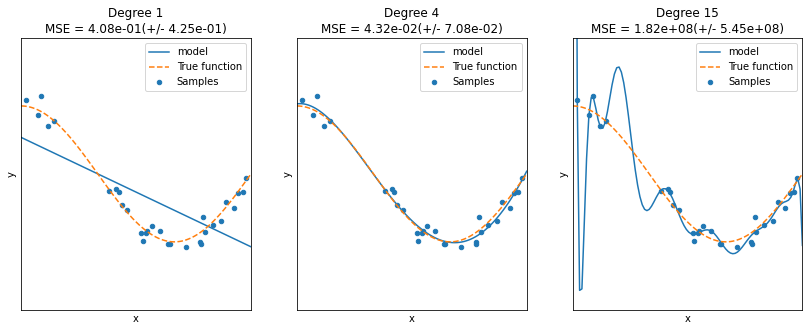

In [50]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

# plt.subplots() :여러 축 생성
# plt.subplot : 한 개 축 생성
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax, xticks=(), yticks=()) #틱값삭제
    
    # 개별 degree 별 Polynomial 객체 생성
    poly_feat = PolynomialFeatures(degree=degrees[i])
    
    # 선형회귀 객체 생성
    linear_reg = LinearRegression()
    
    # Pipeline 객체 생성
    pipeline = Pipeline([
          ('poly', poly_feat)
        , ('lreg', linear_reg) 
    ])
    
    # 학습
    pipeline.fit(X.reshape(-1,1),y)
    
    # 교차 검증 : 오차 (평가)
    scores = cross_val_score(
          pipeline # 모델
        , X.reshape(-1,1) # test data
        , y
        , scoring='neg_mean_squared_error' # 평가지표 지정 => 점수
        , cv=10 # cross_val 개수 지정
    )
    
    # 계수 저장
    coef__ = pipeline.named_steps['lreg'].coef_
    # 정확도 출력
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i], -1 * np.mean(scores)))
    # 시각화
    
    # 0부터 1까지 테스트 데이터를 100개 생성 -> 예측
    X_test = np.linspace(0,1,100) # (start, end, 나눌개수)
    # 예측값 곡선
    plt.plot(
          X_test # X축 값
        , pipeline.predict(X_test[:, np.newaxis],)# y축 값 (예측값)
        , label='model'
    )
    # 실제값 곡선
    plt.plot(
          X_test
        , true_func(X_test)
        , '--'
        , label='True function'
    )
    
    # 데이터분포(산점도)
    plt.scatter(
          X # 원래 데이터
        , y # 원래 답
        , s=20
        , label='Samples'
        
    )
    # 나머지 설정
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    
    # title 지정
    out_str = 'Degree {}\nMSE = {:.2e}(+/- {:.2e})'
    plt.title(out_str.format(
          degrees[i]
        , - scores.mean()
        , scores.std()
    ))
    
    # for end
    
plt.show()

In [51]:
X.shape, X.reshape(-1,1).shape

((30,), (30, 1))

### Regularized Linear Model - Ridge Regression

In [157]:
# boston data loading
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [158]:
X_data = boston.data
y_target = boston.target
# Ridge object
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(
      ridge # 적용할 모델 지정
    , X_data # 데이터 지정
    , y_target # 답
    , scoring='neg_mean_squared_error'# 평가방법
    , cv=5
)

In [159]:
print(' 5 folds 의 개별 Negative MSE scores: ',np.round(neg_mse_scores,3))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]


In [160]:
# RMSE
rmse_scores = np.sqrt(-1 * neg_mse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ',np.round(rmse_scores,3))

 5 folds 의 개별 Negative MSE scores:  [3.38  4.929 5.305 8.637 5.34 ]


In [161]:
# Ridge, alpha = 10 평균 오차
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 평균 MSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 평균 MSE : 5.518 


In [162]:
# Ridge 적용, alpha [0, 0.1, 1, 10, 100]
alphas = [0, 0.1, 1, 10, 100, 125, 500]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(
      ridge # 적용할 모델 지정
    , X_data # 데이터 지정
    , y_target # 답
    , scoring='neg_mean_squared_error'# 평가방법
    , cv=5
    )
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    out_str = 'alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '
    print(out_str.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 
alpha 125 일 때 5 folds 의 평균 RMSE : 5.326 
alpha 500 일 때 5 folds 의 평균 RMSE : 5.450 


### Lasso Regression, Elastic Net

In [163]:
from sklearn.linear_model import  Lasso, ElasticNet

In [164]:
# 데이터프레임 생성
boston_df = pd.DataFrame(
    boston.data
    , columns=boston.feature_names
)

boston_df['PRICE'] = boston.target

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1,inplace=False)

In [165]:
# 위 코드를 처리하는 함수 선언


def get_linear_reg_eval(
      model_name # 모델 (Ridge, Lasso, ElasticNet)
    , params_p=None # parameters => alpha = [0, 1, 2, 3, ...]
    , X_data_p=None # data
    , y_target_p=None # label
    , verbose=True # 출력상세 여부
):
    coef_df = pd.DataFrame()
    # 오차 출력
    if verbose:
        print('######', model_name, '######')
        
    for param in params_p:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        # cross_val_score : 점수 구하는 것만 가능하다.
        neg_mse = cross_val_score(
              model
            , X_data_p
            , y_target_p
            , scoring='neg_mean_squared_error'
            , cv=5
        )
        
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse))
        out_str = 'alpha {0} 일 때 5 folds set 평균 RMSE: {1:.3f}'
        print(out_str.format(param,avg_rmse))
        
    # 계수값 저장 반환
        model.fit(X_data, y_target)
    # 계수값 Series 저장
        coef = pd.Series(
              data=model.coef_ # 계수값
            , index=X_data.columns
        )
        colname = 'alpha : ' + str(param)
        coef_df[colname] = coef

    return coef_df # 계수의 이름(컬럼명), 계수값을 DataFrame

In [166]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coef_lasso_df = get_linear_reg_eval(
      'Lasso'
    , params_p=lasso_alphas
    , X_data_p=X_data
    , y_target_p=y_target
)
coef_lasso_df

###### Lasso ######
alpha 0.07 일 때 5 folds set 평균 RMSE: 5.612
alpha 0.1 일 때 5 folds set 평균 RMSE: 5.615
alpha 0.5 일 때 5 folds set 평균 RMSE: 5.669
alpha 1 일 때 5 folds set 평균 RMSE: 5.776
alpha 3 일 때 5 folds set 평균 RMSE: 6.189


,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


In [167]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coef_elastic_df = get_linear_reg_eval(
      'ElasticNet'
    , params_p=elastic_alphas
    , X_data_p=X_data
    , y_target_p=y_target
)
coef_elastic_df

###### ElasticNet ######
alpha 0.07 일 때 5 folds set 평균 RMSE: 5.542
alpha 0.1 일 때 5 folds set 평균 RMSE: 5.526
alpha 0.5 일 때 5 folds set 평균 RMSE: 5.467
alpha 1 일 때 5 folds set 평균 RMSE: 5.597
alpha 3 일 때 5 folds set 평균 RMSE: 6.068


,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


### 데이터 변환 
- StandardScaler => 정규분포화
- MinMaxScaler => 0~1
- Polynomial => degree 적용, 다항식 적용
- log => 정균분포 형태로 변환

In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

def get_scaled_data(
      method='None' # 변환 방법
    , degree_p=None # 다항식 차수
    , input_data=None # 변환할 데이터
):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
        
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
        
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
        
    else:
        scaled_data = input_data

    if degree_p != None:
        scaled_data = PolynomialFeatures(degree=degree_p).fit_transform(scaled_data)
        
    return scaled_data

In [169]:
alphas = [0.1 , 1, 10, 100]

scaled_methods = [
      (None, None)
    , ('Standard', None)
    , ('Standard', 2)
    , ('MinMax', None)
    , ('MinMax', 2)
    , ('Log', None)
]


for scaled_method in scaled_methods:
    X_data_scaled = get_scaled_data(
          method=scaled_method[0]
        , degree_p=scaled_method[1]
        , input_data=X_data
    )
    out_str = '\n## 변환 유형 : {0}, Polynomial Degree: {1}'
    print(out_str.format(scaled_method[0],scaled_method[1]))
    
    get_linear_reg_eval(
          'Ridge'
        , params_p=alphas
        , X_data_p=X_data_scaled
        , y_target_p=y_target
    )
    


## 변환 유형 : None, Polynomial Degree: None
###### Ridge ######
alpha 0.1 일 때 5 folds set 평균 RMSE: 5.788
alpha 1 일 때 5 folds set 평균 RMSE: 5.653
alpha 10 일 때 5 folds set 평균 RMSE: 5.518
alpha 100 일 때 5 folds set 평균 RMSE: 5.330

## 변환 유형 : Standard, Polynomial Degree: None
###### Ridge ######
alpha 0.1 일 때 5 folds set 평균 RMSE: 5.826
alpha 1 일 때 5 folds set 평균 RMSE: 5.803
alpha 10 일 때 5 folds set 평균 RMSE: 5.637
alpha 100 일 때 5 folds set 평균 RMSE: 5.421

## 변환 유형 : Standard, Polynomial Degree: 2
###### Ridge ######
alpha 0.1 일 때 5 folds set 평균 RMSE: 8.827
alpha 1 일 때 5 folds set 평균 RMSE: 6.871
alpha 10 일 때 5 folds set 평균 RMSE: 5.485
alpha 100 일 때 5 folds set 평균 RMSE: 4.634

## 변환 유형 : MinMax, Polynomial Degree: None
###### Ridge ######
alpha 0.1 일 때 5 folds set 평균 RMSE: 5.764
alpha 1 일 때 5 folds set 평균 RMSE: 5.465
alpha 10 일 때 5 folds set 평균 RMSE: 5.754
alpha 100 일 때 5 folds set 평균 RMSE: 7.635

## 변환 유형 : MinMax, Polynomial Degree: 2
###### Ridge ######
alpha 0.1 일 때 5 folds set 평균 RMSE: 5.298